In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import interp1d, CubicSpline

## Root Finding
**Problem 4.1.1**

In [86]:
def newton_raphson(f, f_prime, x0, tol=1e-6, max_iter=100):
    
    x = x0
    iterations = 0
    xvalues = np.array([x0])
    
    for i in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            return xvalues
        
        fpx = f_prime(x)
        
        x = x - fx / fpx
        xvalues = np.append(xvalues,x)
        iterations += 1
 
    return xvalues

In [87]:
def f(x):
    return np.exp(x-np.sqrt(x)) - x

def f_prime(x):
    return (np.exp(-np.sqrt(x)) - (np.exp(-np.sqrt(x))/(2 * np.sqrt(x)))) * np.exp(x) - 1

xrange = np.linspace(0,1,100)

In [88]:
newton_x = newton_raphson(f, f_prime, 0.01)

In [89]:
xplot = [newton_x[0], newton_x[0], newton_x[1], newton_x[1], newton_x[2], newton_x[2], newton_x[3], newton_x[3], newton_x[4], newton_x[4], newton_x[5], newton_x[5]]
yplot = [f(newton_x[0]), 0, f(newton_x[1]), 0, f(newton_x[2]), 0, f(newton_x[3]), 0, f(newton_x[4]), 0, f(newton_x[5]), 0]

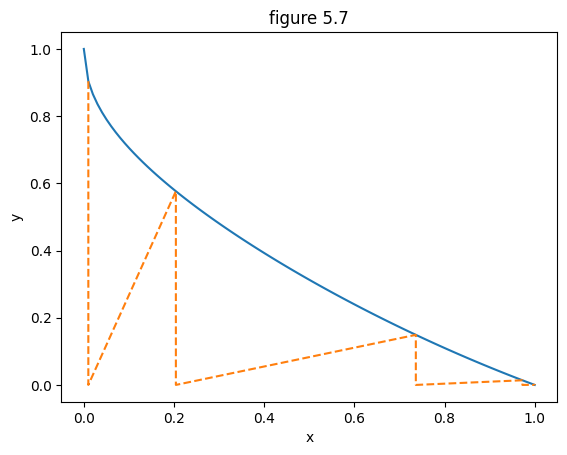

In [90]:
plt.figure()
plt.plot(xrange, f(xrange))
plt.plot(xplot, yplot, "--")

plt.title('figure 5.7')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

**Problem 4.1.2**

In [91]:
a = 1

def u(x):
    return (np.exp(x - np.sqrt(x)) - x)/(x-a)

def u_prime(x):
    return np.exp(-np.sqrt(x)) * (((2*x**(3/2))-x-4*np.sqrt(x)+1)*np.exp(x) + 2*np.exp(x)+2*np.exp(np.sqrt(x))*np.sqrt(x))/(2*np.sqrt(x)*((x-1)**2))

In [92]:
newton_x = newton_raphson(u, u_prime, 2)
xplot = [newton_x[0], newton_x[0], newton_x[1], newton_x[1], newton_x[2], newton_x[2], newton_x[3], newton_x[3], newton_x[4], newton_x[4], newton_x[5], newton_x[5]]
yplot = [u(newton_x[0]), 0, u(newton_x[1]), 0, u(newton_x[2]), 0, u(newton_x[3]), 0, u(newton_x[4]), 0, u(newton_x[5]), 0]

C:\Users\micha\AppData\Local\Temp\ipykernel_16088\512261407.py:4: RuntimeWarning: invalid value encountered in divide
  return (np.exp(x - np.sqrt(x)) - x)/(x-a)


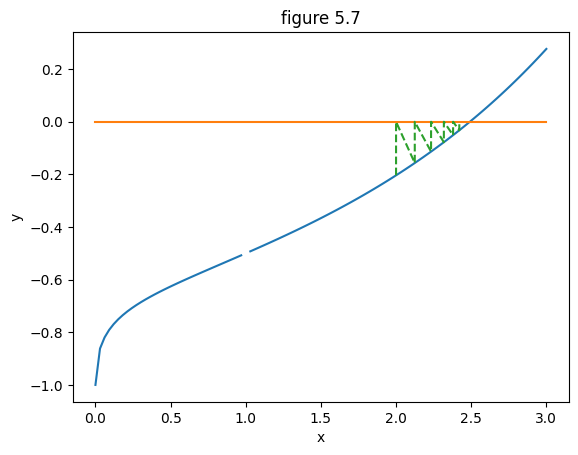

In [93]:
xrange = np.linspace(0,3,100)
plt.figure()
plt.plot(xrange, u(xrange))
plt.plot([0,3],[0,0])
plt.plot(xplot, yplot, "--")

plt.title('figure 5.7')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

**Problem 4.1.3**

In [94]:
def f(x):
    return -(x**5) + 4*x**4 - 4*x**3 + x**2 * np.exp(x) - 2*x**2 + 8*x - 8

In [95]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    iterations = 0
    while (b - a) / 2 > tol and iterations < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            return c, iterations
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iterations += 1
    
    return (a + b) / 2, iterations

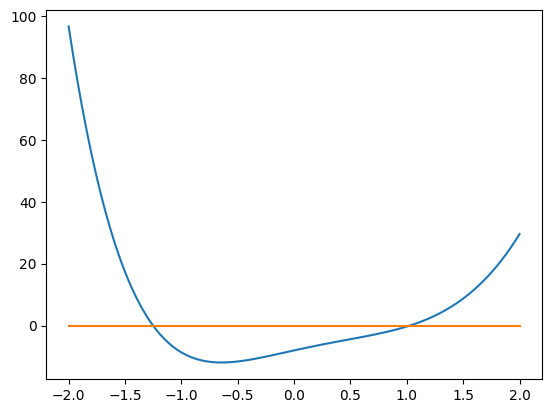

In [96]:
xrange = np.linspace(-2, 2, 100)
plt.plot(xrange, f(xrange))
plt.plot([-2,2],[0,0])

In [ ]:
root_bisect, iter_bisect = bisection_method(f, -1, 2)

print(f"Root found: x = {root_bisect:.10f}")
print(f"f(x) = {f(root_bisect):.2e}")
print(f"Iterations: {iter_bisect}")

Root found: x = 1.0247237682
f(x) = 6.95e-06
Iterations: 21


In [98]:
x0=1

fs_result=fsolve(f,x0)

print(f"fsolve result for root: {fs_result[0]:.3f}")

fsolve result for root: 1.025


## Interpolation
**Problem 4.2.1**

In [99]:
def linear_interpolation(xi, yi, xnew):
    
    ynew = np.zeros_like(xnew, dtype=float)
    
    for i, x in enumerate(xnew):
        if x <= xi[0]:
            ynew[i] = yi[0]
        elif x >= xi[-1]:
            ynew[i] = yi[-1]
        else:
            j = np.searchsorted(xi, x) - 1
            ynew[i] = yi[j] + (yi[j+1] - yi[j]) * (x - xi[j]) / (xi[j+1] - xi[j])
            
    return ynew

In [100]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([2, 1, 3, 5, 1])

xnew = np.linspace(0, 4, 50)

y_custom = linear_interpolation(x, y, xnew)

interp_func = interp1d(x, y, kind='linear')
y_scipy = interp_func(xnew)

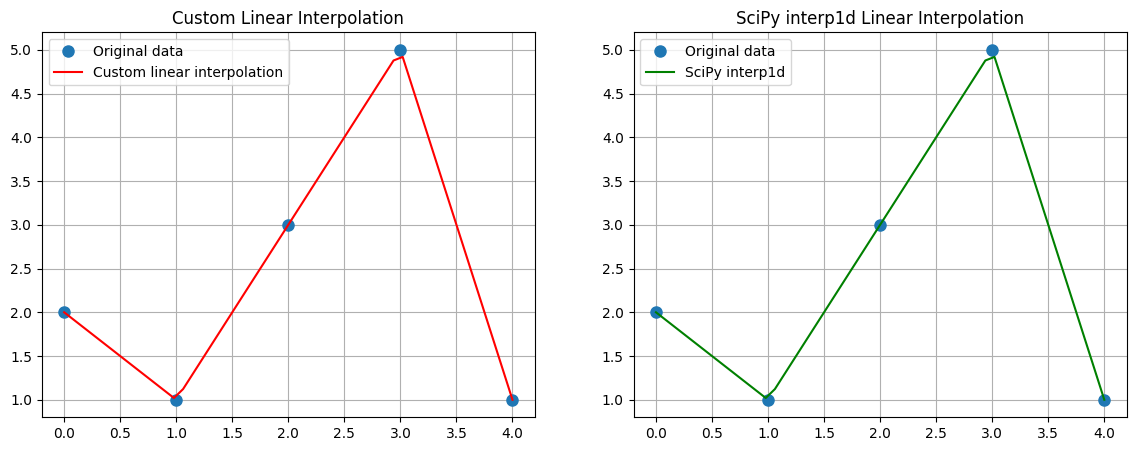

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(x, y, 'o', label='Original data', markersize=8)
axs[0].plot(xnew, y_custom, '-', color='red', label='Custom linear interpolation')
axs[0].set_title('Custom Linear Interpolation')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(x, y, 'o', label='Original data', markersize=8)
axs[1].plot(xnew, y_scipy, '-', color='green', label='SciPy interp1d')
axs[1].set_title('SciPy interp1d Linear Interpolation')
axs[1].legend()
axs[1].grid(True)

plt.show()

**Problem 4.2.2**

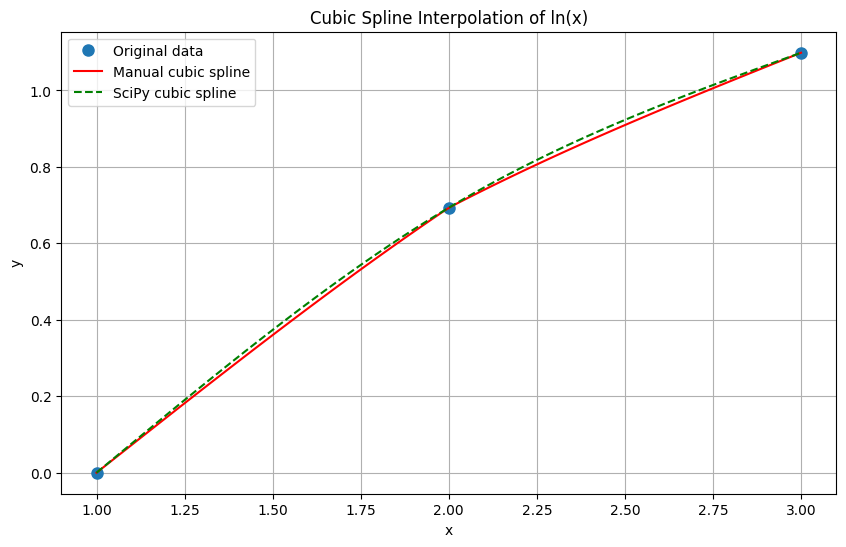

In [102]:
x = np.array([1, 2, 3], dtype=float)
y = np.log(x)

n = len(x) - 1

h = np.diff(x)

A = np.zeros((n+1, n+1))
b = np.zeros(n+1)

A[0, 0] = 1
A[-1, -1] = 1

for i in range(1, n):
    A[i, i-1] = h[i-1]
    A[i, i] = 2 * (h[i-1] + h[i])
    A[i, i+1] = h[i]
    b[i] = 3 * ((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])

M = np.linalg.solve(A, b)

xnew = np.linspace(1, 3, 100)
y_spline_manual = np.zeros_like(xnew)

for k, xi in enumerate(xnew):
    if xi <= x[0]:
        i = 0
    elif xi >= x[-1]:
        i = n-1
    else:
        i = np.searchsorted(x, xi) - 1
    hi = x[i+1] - x[i]
    xi0 = x[i]
    xi1 = x[i+1]
    Mi = M[i]
    Mi1 = M[i+1]
    yi = y[i]
    yi1 = y[i+1]
    
    y_spline_manual[k] = (Mi*(xi1 - xi)**3/(6*hi) + Mi1*(xi - xi0)**3/(6*hi) +
                          (yi/hi - Mi*hi/6)*(xi1 - xi) + (yi1/hi - Mi1*hi/6)*(xi - xi0))

cs = CubicSpline(x, y, bc_type='natural')
y_spline_scipy = cs(xnew)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', label='Original data', markersize=8)
plt.plot(xnew, y_spline_manual, '-', color='red', label='Manual cubic spline')
plt.plot(xnew, y_spline_scipy, '--', color='green', label='SciPy cubic spline')
plt.title('Cubic Spline Interpolation of ln(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**Problem 4.2.3**

True value at x=5.7: 3.0779
Linear (degree 1) interpolation: -27.6303
Quadratic (degree 2) interpolation: 30.7592
Cubic (degree 3) interpolation: -20.4429
Cubic spline interpolation: 2.8340


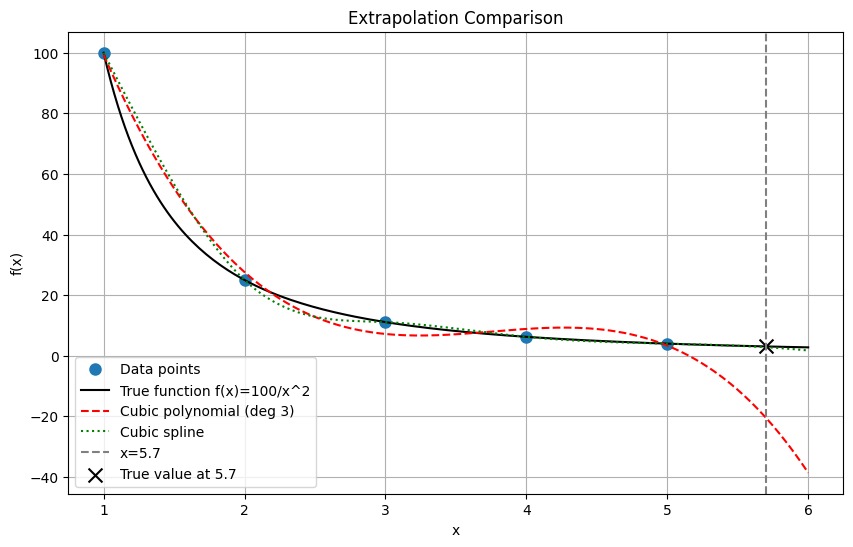

In [103]:
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([100.0, 25.0, 11.111, 6.25, 4.0])

def f_true(x):
    return 100 / x**2

x_extrap = 5.7
y_true = f_true(x_extrap)

def poly_interp(x_data, y_data, degree, x_val):
    coeffs = np.polyfit(x_data, y_data, degree)
    p = np.poly1d(coeffs)
    return p(x_val)

y_poly1 = poly_interp(x, y, 1, x_extrap)
y_poly2 = poly_interp(x, y, 2, x_extrap)
y_poly3 = poly_interp(x, y, 3, x_extrap)

cs = CubicSpline(x, y, bc_type='natural')
y_spline = cs(x_extrap)

print(f"True value at x={x_extrap}: {y_true:.4f}")
print(f"Linear (degree 1) interpolation: {y_poly1:.4f}")
print(f"Quadratic (degree 2) interpolation: {y_poly2:.4f}")
print(f"Cubic (degree 3) interpolation: {y_poly3:.4f}")
print(f"Cubic spline interpolation: {y_spline:.4f}")

xplot = np.linspace(1, 6, 200)
yplot_true = f_true(xplot)
yplot_poly3 = np.poly1d(np.polyfit(x, y, 3))(xplot)
yplot_spline = cs(xplot)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', label='Data points', markersize=8)
plt.plot(xplot, yplot_true, 'k-', label='True function f(x)=100/x^2')
plt.plot(xplot, yplot_poly3, '--', color='red', label='Cubic polynomial (deg 3)')
plt.plot(xplot, yplot_spline, ':', color='green', label='Cubic spline')
plt.axvline(x_extrap, color='gray', linestyle='--', label=f'x={x_extrap}')
plt.scatter(x_extrap, y_true, color='black', marker='x', s=100, label='True value at 5.7')
plt.title('Extrapolation Comparison')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

**Problem 4.3.1**

Method 1 (Linear algebra): m = 0.4027, b = 2.0345
Method 2 (NumPy lstsq): m = 0.4027, b = 2.0345


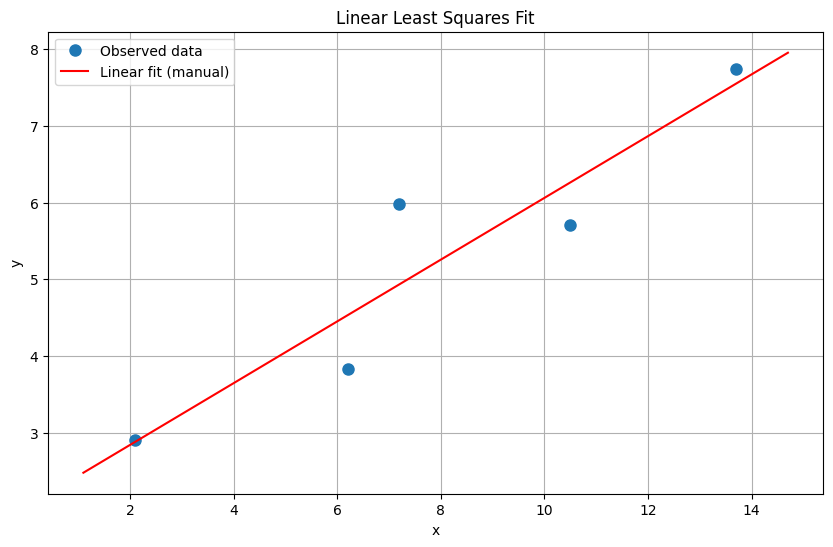

In [ ]:
x = np.array([2.1, 6.2, 7.2, 10.5, 13.7])
y = np.array([2.90, 3.83, 5.98, 5.71, 7.74])

A = np.vstack([x, np.ones(len(x))]).T

ATA = A.T @ A
ATy = A.T @ y
theta_manual = np.linalg.solve(ATA, ATy)

m_manual, b_manual = theta_manual
print(f"Method 1 (Linear algebra): m = {m_manual:.4f}, b = {b_manual:.4f}")

theta_lstsq, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
m_lstsq, b_lstsq = theta_lstsq
print(f"Method 2 (NumPy lstsq): m = {m_lstsq:.4f}, b = {b_lstsq:.4f}")

x_plot = np.linspace(min(x)-1, max(x)+1, 100)
y_fit_manual = m_manual * x_plot + b_manual

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', label='Observed data', markersize=8)
plt.plot(x_plot, y_fit_manual, '-', color='red', label='Linear fit (manual)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Least Squares Fit')
plt.legend()
plt.grid(True)
plt.show()

**Problem 4.3.2**

Cubic polynomial coefficients (manual):
a = 0.9991, b = -1.0001, c = -8.9661, d = 9.0110
Cubic polynomial coefficients (lstsq):
a = 0.9991, b = -1.0001, c = -8.9661, d = 9.0110


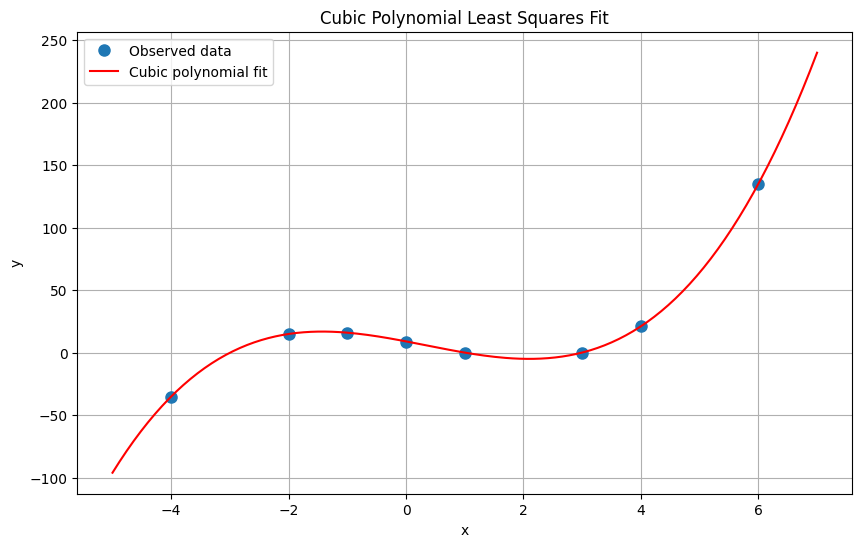

In [105]:
x = np.array([-4, -2, -1, 0, 1, 3, 4, 6], dtype=float)
y = np.array([-35.1, 15.1, 15.9, 8.9, 0.1, 0.1, 21.1, 135], dtype=float)

A = np.vstack([x**3, x**2, x, np.ones(len(x))]).T

coeffs_manual = np.linalg.solve(A.T @ A, A.T @ y)
a, b, c, d = coeffs_manual
print(f"Cubic polynomial coefficients (manual):")
print(f"a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}")

coeffs_lstsq, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
a2, b2, c2, d2 = coeffs_lstsq
print(f"Cubic polynomial coefficients (lstsq):")
print(f"a = {a2:.4f}, b = {b2:.4f}, c = {c2:.4f}, d = {d2:.4f}")

x_plot = np.linspace(min(x)-1, max(x)+1, 200)
y_fit = a*x_plot**3 + b*x_plot**2 + c*x_plot + d

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', label='Observed data', markersize=8)
plt.plot(x_plot, y_fit, '-', color='red', label='Cubic polynomial fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Polynomial Least Squares Fit')
plt.legend()
plt.grid(True)
plt.show()

**Problem 4.3.3**

Converged after 9 iterations
Fitted parameters: a = 0.2801, b = 0.3625
Chi-squared: 856.6138


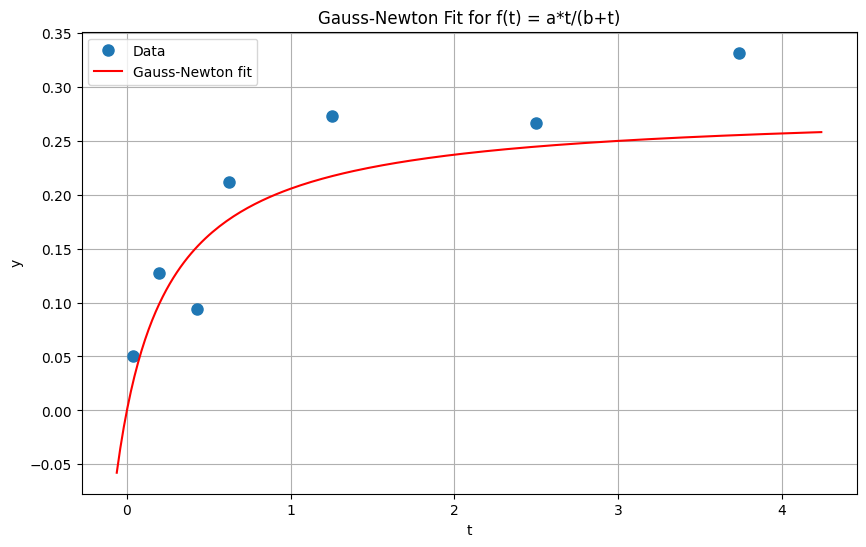

In [106]:
t = np.array([0.038, 0.194, 0.425, 0.626, 1.253, 2.500, 3.740])
y = np.array([0.050, 0.127, 0.094, 0.2122, 0.2729, 0.2665, 0.3317])

sigma = 0.03 * y

def f_model(t, a, b):
    return a * t / (b + t)

def jacobian(t, a, b):
    df_da = t / (b + t)
    df_db = -a * t / (b + t)**2
    return np.vstack([df_da, df_db]).T

a, b = 1.0, 1.0

max_iter = 100
tolerance = 0.01
residual_old = np.inf

for iteration in range(1, max_iter+1):
    f = f_model(t, a, b)
    r = y - f
    J = jacobian(t, a, b)
    J_weighted = J / sigma[:, np.newaxis]
    r_weighted = r / sigma
    
    delta = np.linalg.solve(J_weighted.T @ J_weighted, J_weighted.T @ r_weighted)
    
    a += delta[0]
    b += delta[1]
    
    res_norm = np.linalg.norm(r)
    if np.abs(res_norm - residual_old)/res_norm < tolerance:
        break
    
    residual_old = res_norm

print(f"Converged after {iteration} iterations")
print(f"Fitted parameters: a = {a:.4f}, b = {b:.4f}")

chi2 = np.sum(((y - f_model(t, a, b)) / sigma)**2)
print(f"Chi-squared: {chi2:.4f}")

t_plot = np.linspace(min(t)-0.1, max(t)+0.5, 200)
y_fit = f_model(t_plot, a, b)

plt.figure(figsize=(10,6))
plt.plot(t, y, 'o', label='Data', markersize=8)
plt.plot(t_plot, y_fit, '-', color='red', label='Gauss-Newton fit')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Gauss-Newton Fit for f(t) = a*t/(b+t)')
plt.legend()
plt.grid(True)
plt.show()